# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Mengambil data dengan cara webscrapping dari perubahan kurs dari nilai tukar dolar ke rupiah dari web exchange rate. 

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

In [4]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   USD to IDR exchange rate history
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [5]:
table = soup.find('table',attrs={'class':'history-rates-data'})
print(table.prettify()[1:500])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2023-05-11">
     May 11, 2023
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2023-05-11">
     2023-5-11
    </a>
   </td>
   <td>
    <span class="w">
     <span class="now


Finding row length.

In [6]:
table.find_all('a',attrs={'class':'w'})[:5]

[<a class="w" href="/exchange-rate-history/usd-idr-2023-05-11">May 11, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-05-10">May 10, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-05-09">May 9, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-05-08">May 8, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-05-05">May 5, 2023</a>]

In [7]:
table_all=table.find_all('a',attrs={'class':'w'})
row_length = len(table_all)
row_length

129

In [8]:
table.find_all('a',attrs={'class':'w'})[0].text

'May 11, 2023'

In [9]:
table.find_all('span',attrs={'class':'w'})[0].text

'$1 = Rp14,776'

Do the scrapping process here (please change this markdown with your explanation)

In [10]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #scrapping process
    periode=table.find_all('a',attrs={'class':'w'})[i].text
    price=table.find_all('span',attrs={'class':'w'})[i].text
    temp.append ((periode,price))
    
temp 

[('May 11, 2023', '$1 = Rp14,776'),
 ('May 10, 2023', '$1 = Rp14,698'),
 ('May 9, 2023', '$1 = Rp14,776'),
 ('May 8, 2023', '$1 = Rp14,744'),
 ('May 5, 2023', '$1 = Rp14,675'),
 ('May 4, 2023', '$1 = Rp14,699'),
 ('May 3, 2023', '$1 = Rp14,680'),
 ('May 2, 2023', '$1 = Rp14,747'),
 ('May 1, 2023', '$1 = Rp14,677'),
 ('April 28, 2023', '$1 = Rp14,674'),
 ('April 27, 2023', '$1 = Rp14,691'),
 ('April 26, 2023', '$1 = Rp14,841'),
 ('April 25, 2023', '$1 = Rp14,940'),
 ('April 24, 2023', '$1 = Rp14,934'),
 ('April 21, 2023', '$1 = Rp14,936'),
 ('April 20, 2023', '$1 = Rp14,954'),
 ('April 19, 2023', '$1 = Rp14,995'),
 ('April 18, 2023', '$1 = Rp14,889'),
 ('April 17, 2023', '$1 = Rp14,850'),
 ('April 14, 2023', '$1 = Rp14,782'),
 ('April 13, 2023', '$1 = Rp14,722'),
 ('April 12, 2023', '$1 = Rp14,835'),
 ('April 11, 2023', '$1 = Rp14,915'),
 ('April 10, 2023', '$1 = Rp14,950'),
 ('April 7, 2023', '$1 = Rp14,941'),
 ('April 6, 2023', '$1 = Rp14,931'),
 ('April 5, 2023', '$1 = Rp14,960'),
 (

## Creating data frame & Data wrangling

Put the array into dataframe

In [14]:
import pandas as pd

df = pd.DataFrame(temp, columns=('periode','price'))
df.head()

,periode,price
0,"May 11, 2023","$1 = Rp14,776"
1,"May 10, 2023","$1 = Rp14,698"
2,"May 9, 2023","$1 = Rp14,776"
3,"May 8, 2023","$1 = Rp14,744"
4,"May 5, 2023","$1 = Rp14,675"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [15]:
df['price']=df['price'].str.replace("$1 = Rp","")
df['price']=df['price'].str.replace(",","")
df

,periode,price
0,"May 11, 2023",14.776
1,"May 10, 2023",14.698
2,"May 9, 2023",14.776
3,"May 8, 2023",14.744
4,"May 5, 2023",14.675
...,...,...
124,"November 18, 2022",15.641
125,"November 17, 2022",15.714
126,"November 16, 2022",15.639
127,"November 15, 2022",15.557


In [19]:
df['price']=df['price'].astype('float64')
df['periode']=df['periode'].astype('datetime64[ns]')


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [20]:
df.dtypes

periode    datetime64[ns]
price             float64
dtype: object

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [22]:
df=df.set_index('periode')

<Axes: xlabel='periode'>

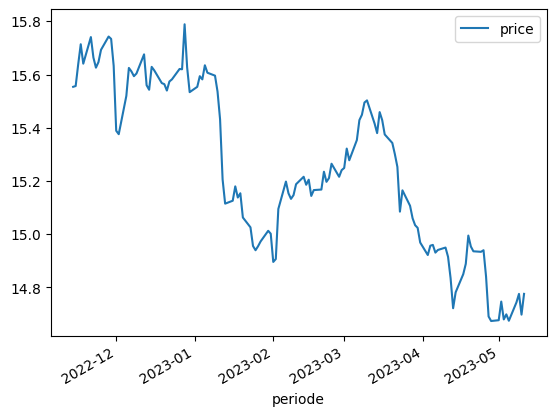

In [23]:
df.plot()

Analysis :
- Nilai kurs tertinggi pada 28 Dec 2022
- nilai kurs periode Dec 2022- Jan 2023 lebih tinggi dibandingkan periode setelahnya sampai May 2023

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.